## **HCI2001 Notification Interaction Experiment**
- Abello, Hans
- Badiola, Maxine
- Custer, John
- Fausto, Bea
- Leonida, Patrick
- Yongco, Denzel


## **Reading the dataset**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Reading the Urgent Results dataset
urgent_df = pd.read_csv('data/urgent-results.csv')

# Reading the Non-Urgent Results dataset
nonurgent_df = pd.read_csv('data/nonurgent-results.csv')

## **I. Dataset Description**
---
### The Dataset
For this exploratory data analysis, the dataset to be utilized is the data gathered from the Notification Interaction Experiment. There are two datasets, ***urgent results*** and ***non-urgent results***. The urgent results dataset contains data from participants who underwent the test and have selected the urgent scenario, while the non-urgent results dataset contains data from participants who underwent the test and have selected the non-urgent scenario.


\

### Data Collection
The core of the data collection method lies in a simulated Simon Says game. Participants will be instructed on a sequence of actions and presented with notifications during gameplay. The user will copy the ordering of the colors flashed on the color wheel. For instance, when the game highlights blue, the user must click blue. Notifications will be displayed on the screen and the user gets to decide what to do with that notification. Participants can choose to *Accept, Dismiss, or Ignore* the notifications. This design allows for the observation of user behavior under controlled conditions while mimicking a real-world scenario of receiving notifications during task completion. The game only ends when the user interacts with 30 unique notifications. As a result, a copy of the user's results will be downloaded and saved as a CSV file. Gamification introduces an element of playfulness and engagement, encouraging participants to actively interact with the simulated environment.  By integrating notifications within a game like Simon Says, we can create a more realistic scenario where participants need to prioritize between the game's instructions and the demands of the notifications. This approach allows us to observe user behavior closer to how they might react to notifications in their daily lives. The controlled environment of the simulated game has various advantages. First, it enables standardization. Every participant sees the identical game mechanics and notification presentations, reducing external influences that could bias the results. Second, the gamified approach encourages active engagement, resulting in a more comprehensive data set than passive methods such as surveys. Finally, the game captures user actions with specific timestamps, allowing us to examine not only the choices made, but also the time it takes to respond, which can provide useful insights into urgency perception and decision-making speed.

\
### Data Structure
In both of the datasets, a ***row*** represents an observation and a ***column*** pertains to a variable being measured. There are a total of ***9*** observations and ***4*** variables for each of the datasets.

\
### Variable Definition
The following are the descriptions of each variable in the dataset based on the `urgent-results.csv` and `nonurgent-results.csv` files:
- **`color`**: the color of the notification *(red, green, or blue)*
- **`category`**: the category of the notification *(emergency, social, or work)*
- **`status`**: the interaction type of the user
- **`interactionTime`**: the time it takes for the user to interact with the notification



## **II. Data Cleaning**
---
### Filtering the variables
Since the variables in both of the datasets are already limited and all variables will be utilized in the exploratory data analysis, there would be no reason to remove a variable from the study.


\

### Removing 'NaN' or empty data
To proceed, we will look for any remaining empty entries in the datasets.

In [99]:
# Urgent Results Dataset
urgent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   color            180 non-null    object 
 1   category         180 non-null    object 
 2   status           180 non-null    object 
 3   interactionTime  180 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.8+ KB


In [100]:
# Non-Urgent Results Dataset
nonurgent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   color            180 non-null    object 
 1   category         180 non-null    object 
 2   status           180 non-null    object 
 3   interactionTime  180 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.8+ KB


Based on the functions used above, given that the 180 Non-Null Count on the overall entries matches with the 180 Non-Null Count on each of the variables, we can say that there are no missing variables for both of the datasets.


### Filtering ignored notifications

In [101]:
ignored_urgent_df = urgent_df[urgent_df['status'] == 'ignored']
len(ignored_urgent_df)

44

In [102]:
ignored_nonurgent_df = nonurgent_df[nonurgent_df['status'] == 'ignored']
len(ignored_nonurgent_df)

36

We have to filter the ignored notifications out of both datasets.

In [103]:
urgent_df = urgent_df[urgent_df['status'] != 'ignored'] 
nonurgent_df = nonurgent_df[nonurgent_df['status'] != 'ignored']

In [104]:
# Checking the 'color' variable in the Urgent Results Dataset
column_to_check = 'color'
expected_data_type = str

for value in urgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'color' of the Urgent Results dataset is correct and matches the expected data type.


In [105]:
# Checking the 'category' variable in the Urgent Results Dataset
column_to_check = 'category'
expected_data_type = str

for value in urgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'category' of the Urgent Results dataset is correct and matches the expected data type.


In [106]:
# Checking the 'status' variable in the Urgent Results Dataset
column_to_check = 'status'
expected_data_type = str

for value in urgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'status' of the Urgent Results dataset is correct and matches the expected data type.


In [107]:
# Checking the 'interactionTime' variable in the Urgent Results Dataset
column_to_check = 'interactionTime'
expected_data_type = float

for value in urgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'interactionTime' of the Urgent Results dataset is correct and matches the expected data type.


In [108]:
# Checking the 'color' variable in the Non-Urgent Results Dataset
column_to_check = 'color'
expected_data_type = str

for value in nonurgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Non-Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'color' of the Non-Urgent Results dataset is correct and matches the expected data type.


In [109]:
# Checking the 'category' variable in the Non-Urgent Results Dataset
column_to_check = 'category'
expected_data_type = str

for value in nonurgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Non-Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'category' of the Non-Urgent Results dataset is correct and matches the expected data type.


In [110]:
# Checking the 'status' variable in the Non-Urgent Results Dataset
column_to_check = 'status'
expected_data_type = str

for value in nonurgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Non-Urgent Results dataset is correct and matches the expected data type.")

The data type of all values in 'status' of the Non-Urgent Results dataset is correct and matches the expected data type.


In [111]:
# Checking the 'interactionTime' variable in the Non-Urgent Results Dataset
column_to_check = 'category'
expected_data_type = float

for value in nonurgent_df[column_to_check]:
    data_type = type(value)
    if data_type != expected_data_type:
        print(f"The data type of '{column_to_check}' is incorrect. Expected data type is {expected_data_type}, but it is {data_type}.")
        break

else:
    print(f"The data type of all values in '{column_to_check}' of the Non-Urgent Results dataset is correct and matches the expected data type.")

The data type of 'category' is incorrect. Expected data type is <class 'float'>, but it is <class 'str'>.


As seen in the functions ran above, all the values of both datasets match the expected data type.

\
### Transforming Values
Because the values of both datasets match the expected data type, there is no need to transform the data types of the **`color`**, **`category`**, **`status`**, and **`interactionTime`** columns.

\
### Post-cleaning

In [112]:
urgent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 36 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   color            136 non-null    object 
 1   category         136 non-null    object 
 2   status           136 non-null    object 
 3   interactionTime  136 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.3+ KB


In [113]:
nonurgent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 36 to 179
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   color            144 non-null    object 
 1   category         144 non-null    object 
 2   status           144 non-null    object 
 3   interactionTime  144 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


After cleaning, we can see that there is no change that happened after the data cleaning in both of the datasets.

## **III. Exploratory Data Analysis**
---
### Question 1: How does interaction time vary across different categories and statuses in each dataset?


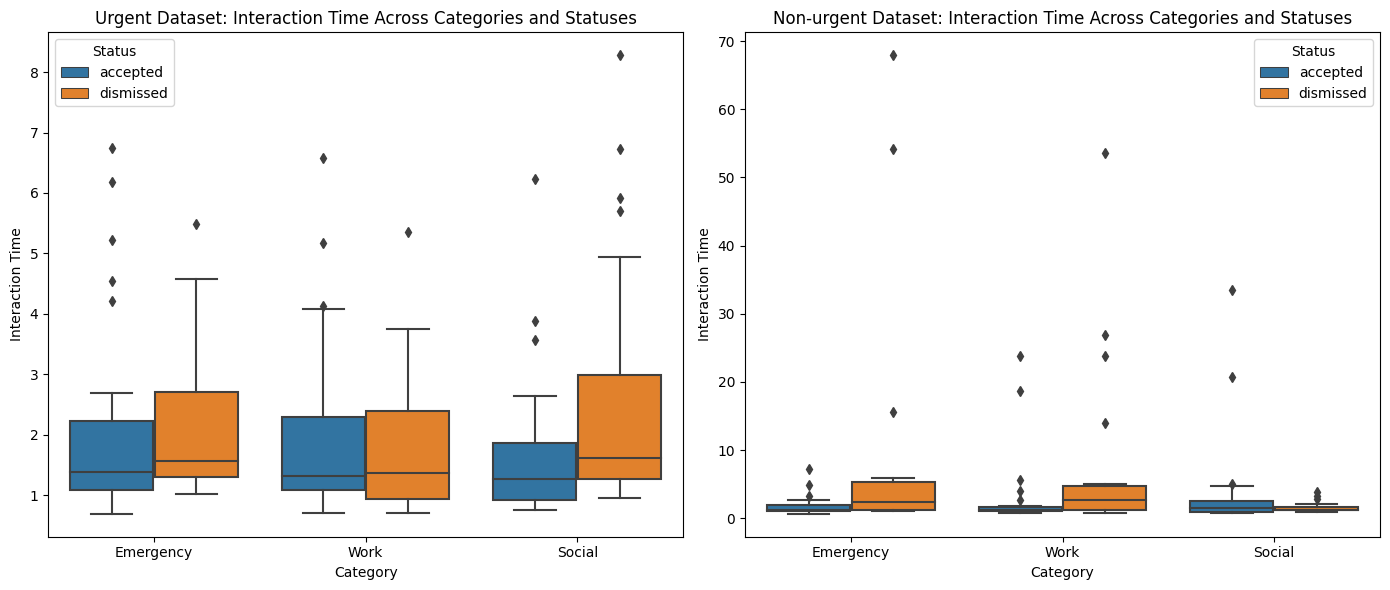

In [114]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='category', y='interactionTime', hue='status', data=urgent_df)
plt.title('Urgent Dataset: Interaction Time Across Categories and Statuses')
plt.xlabel('Category')
plt.ylabel('Interaction Time')
plt.legend(title='Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='interactionTime', hue='status', data=nonurgent_df)
plt.title('Non-urgent Dataset: Interaction Time Across Categories and Statuses')
plt.xlabel('Category')
plt.ylabel('Interaction Time')
plt.legend(title='Status')

plt.tight_layout()
plt.show()

In [115]:
nonurgent_df[(nonurgent_df['category'] == 'Social') & (nonurgent_df['interactionTime'] >= 0) & (nonurgent_df['status'] == 'accepted')].max()

color                   Red
category             Social
status             accepted
interactionTime      33.455
dtype: object

In [116]:
nonurgent_df[(nonurgent_df['category'] == 'Social') & (nonurgent_df['interactionTime'] >= 0) & (nonurgent_df['status'] == 'accepted')].min()

color                  Blue
category             Social
status             accepted
interactionTime       0.787
dtype: object

In [117]:
urgent_df.groupby(['category']).mean()

C:\Users\dbyon\AppData\Local\Temp\ipykernel_7852\3119725289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urgent_df.groupby(['category']).mean()


,interactionTime
category,
Emergency,2.146114
Social,2.263298
Work,1.987733


In [118]:
urgent_df.groupby(['category']).std()

C:\Users\dbyon\AppData\Local\Temp\ipykernel_7852\2555037723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urgent_df.groupby(['category']).std()


,interactionTime
category,
Emergency,1.543255
Social,1.821471
Work,1.414236


In [119]:
nonurgent_df.groupby(['category']).mean()

C:\Users\dbyon\AppData\Local\Temp\ipykernel_7852\3218831038.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nonurgent_df.groupby(['category']).mean()


,interactionTime
category,
Emergency,4.777938
Social,2.755500
Work,4.919625


In [120]:
nonurgent_df.groupby(['category']).std()

C:\Users\dbyon\AppData\Local\Temp\ipykernel_7852\4031121759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nonurgent_df.groupby(['category']).std()


,interactionTime
category,
Emergency,12.178561
Social,5.386973
Work,9.568581


In both of the datasets it is evident that the notification status is mostly *Accepted*.

**Urgent Dataset**:
- For the category "Emergency," all interactions are accepted with interaction times ranging from approximately 0.7 to 6.7.
- For the category "Work," all interactions are accepted with interaction times ranging from approximately 0.7 to 6.6.
- For the category "Social," one interaction is dismissed with an interaction time of around 2.0, while the rest are accepted, with interaction times ranging from approximately 0.7 to 6.2.

**Non-Urgent Dataset**:
- For the category "Emergency," all interactions are accepted with interaction times ranging from approximately 0.6 to 7.1.
- For the category "Work," all interactions are accepted with interaction times ranging from approximately 0.7 to 23.8.
- For the category "Social," one interaction is ignored, indicated by a value of -1, and the rest are accepted, with interaction times ranging from approximately 0.8 to 33.5.

\
### Question 2: Is there any difference in the relationship between color and status between the two datasets?

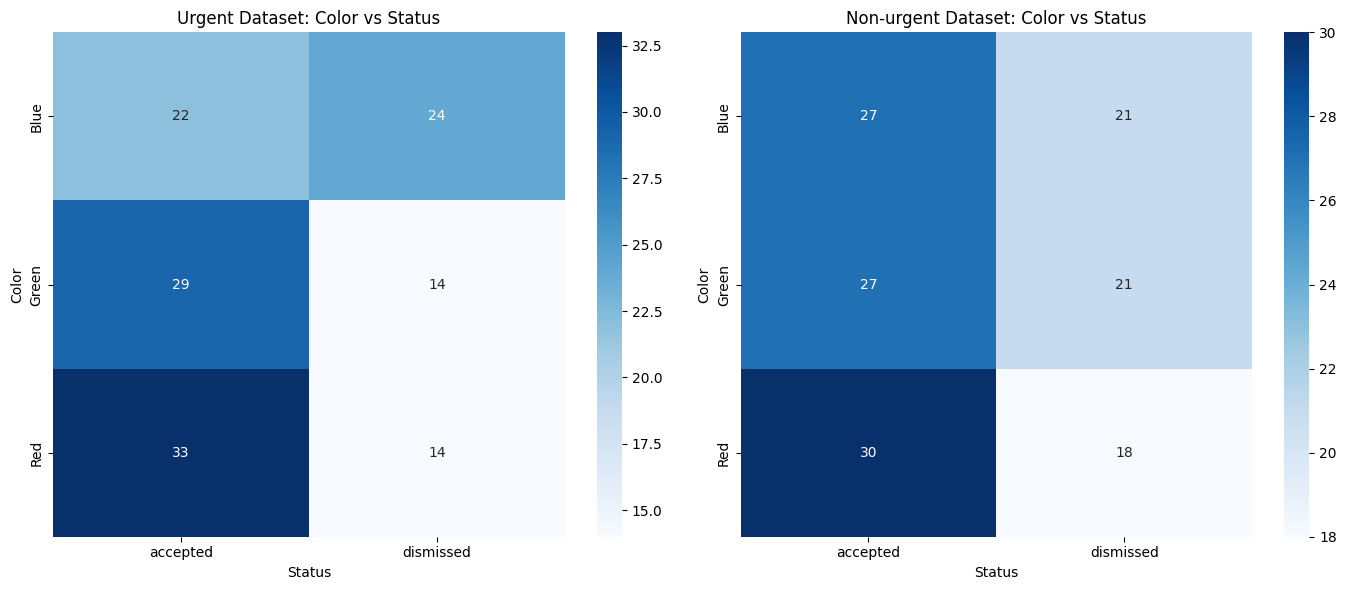

In [121]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pd.crosstab(urgent_df['color'], urgent_df['status']), annot=True, cmap='Blues')
plt.title('Urgent Dataset: Color vs Status')
plt.xlabel('Status')
plt.ylabel('Color')

plt.subplot(1, 2, 2)
sns.heatmap(pd.crosstab(nonurgent_df['color'], nonurgent_df['status']), annot=True, cmap='Blues')
plt.title('Non-urgent Dataset: Color vs Status')
plt.xlabel('Status')
plt.ylabel('Color')

plt.tight_layout()
plt.show()

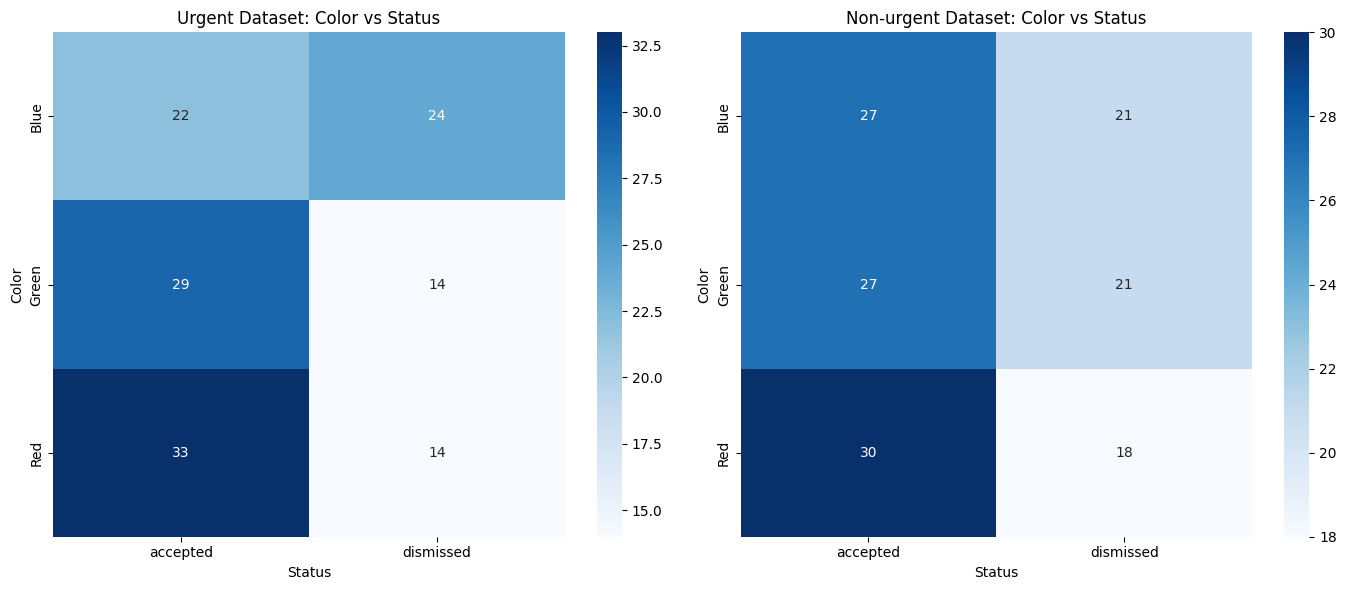

In [122]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pd.crosstab(urgent_df['color'], urgent_df['status']), annot=True, cmap='Blues')
plt.title('Urgent Dataset: Color vs Status')
plt.xlabel('Status')
plt.ylabel('Color')

plt.subplot(1, 2, 2)
sns.heatmap(pd.crosstab(nonurgent_df['color'], nonurgent_df['status']), annot=True, cmap='Blues')
plt.title('Non-urgent Dataset: Color vs Status')
plt.xlabel('Status')
plt.ylabel('Color')

plt.tight_layout()
plt.show()

The heatmaps represents the count of occurrences of a specific color-status combination within the urgent dataset. The color intensity in each cell indicates the count of observations: darker shades represent higher counts, while lighter shades represent lower counts.

**Urgent Dataset**:
- In the urgent dataset, for the color *Red*, there are 33 interactions that are *accepted*, 14 interaction that is *dismissed*, and 3 interactions that is ignored. This is represented by darker shades in the respective cells.

- For the color *Green*, 29 interactions were *accepted*, 14 is also *dismissed*, and 3 are also *ignored*

- Similarly, there are also 3 interactions that were *ignored* for the color *Blue*. On the other hand, it has 22 interactions that were *accepted* and 24 that are *dismissed*

**Non-Urgent Dataset**:
- In the non-urgent dataset, for the color *Red*, there are 30 interactions that are *accepted*, 18 interactions that is *dismissed*. The *ignored* interaction is indicated by a count of 3
- For the colors *Green* 27 are *accepted*, 21 *dismissed*, and 3 *ignored*.
- Lastly for the color Blue, 27 interactions are accepted, 21 are *dismissed*, 3 are *ignored*

Generally, the behavior shown by participants in both of the scenarios wherein the color red on both datasets has the most accepted interactions in the color group. Something to note also is that there are generally more dismissed interactions in the non-urgent dataset, which is to be expected as the level of urgency is lower as compared to the urgent dataset.

\
### Question 3: Are there any differences in the average interaction times between the urgent and non-urgent datasets?



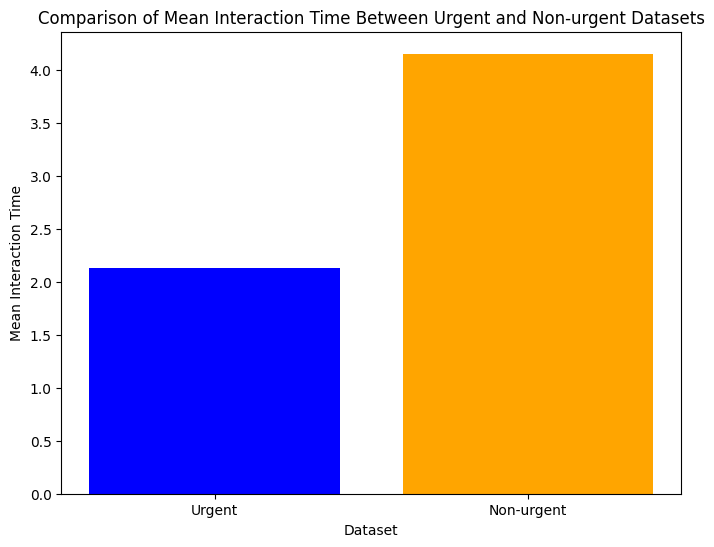

Descriptive Statistics for Urgent Dataset:
count    136.000000
mean       2.134206
std        1.598112
min        0.689000
25%        1.104500
50%        1.435000
75%        2.446750
max        8.280000
Name: interactionTime, dtype: float64

Descriptive Statistics for Non-urgent Dataset:
count    144.000000
mean       4.151021
std        9.453140
min        0.641000
25%        1.088000
50%        1.355500
75%        2.590750
max       67.916000
Name: interactionTime, dtype: float64


In [123]:
urgent_mean_interaction_time = urgent_df['interactionTime'].mean()
nonurgent_mean_interaction_time = nonurgent_df['interactionTime'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Urgent', 'Non-urgent'], [urgent_mean_interaction_time, nonurgent_mean_interaction_time], color=['blue', 'orange'])
plt.title('Comparison of Mean Interaction Time Between Urgent and Non-urgent Datasets')
plt.xlabel('Dataset')
plt.ylabel('Mean Interaction Time')
plt.show()

print("Descriptive Statistics for Urgent Dataset:")
print(urgent_df['interactionTime'].describe())
print("\nDescriptive Statistics for Non-urgent Dataset:")
print(nonurgent_df['interactionTime'].describe())

In [124]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(urgent_df['interactionTime'], nonurgent_df['interactionTime'])

print("Independent Samples t-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference between the mean interaction times of the urgent and non-urgent datasets.")
else:
    print("There is no significant difference between the mean interaction times of the urgent and non-urgent datasets.")

Independent Samples t-test Results:
T-statistic: -2.454905605054188
P-value: 0.014704991416315231
There is a significant difference between the mean interaction times of the urgent and non-urgent datasets.


From the bar plot, we can see that the mean interaction time is higher in the *non-urgent dataset* compared to the *urgent dataset*. This indicates that, on average, interactions in the non-urgent context tend to take longer than those in the urgent context. Furthermore, the difference between the means is 1.937404. Turning to the independent samples t-test there is describes the there is a significant difference between the mean interaction times of the *urgent* and *non_urgent* datasets.


### Question 4: Is there any correlation between category and status in each dataset?

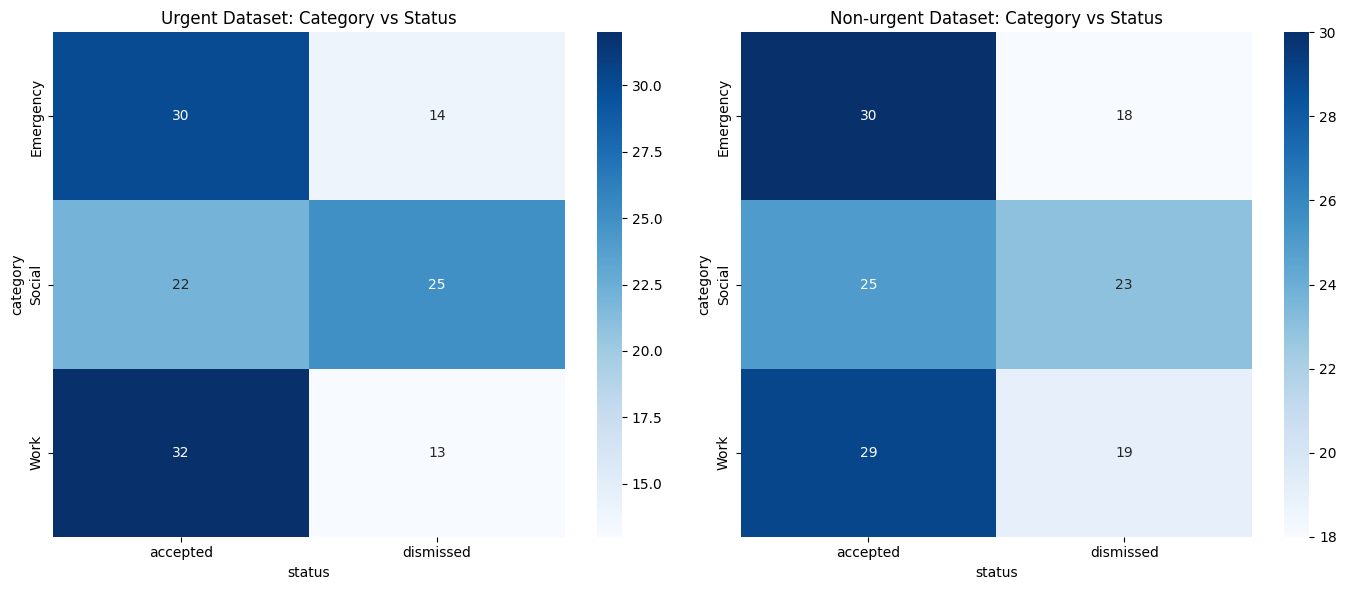

Urgent Dataset:
Chi-square statistic: 6.883579462302869
P-value: 0.03200734948484527
There is a significant correlation between category and status in the urgent dataset.

Non-urgent Dataset:
Chi-square statistic: 1.2000000000000002
P-value: 0.5488116360940265
There is no significant correlation between category and status in the non-urgent dataset.


In [125]:
urgent_contingency_table = pd.crosstab(urgent_df['category'], urgent_df['status'])
nonurgent_contingency_table = pd.crosstab(nonurgent_df['category'], nonurgent_df['status'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(urgent_contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Urgent Dataset: Category vs Status')

plt.subplot(1, 2, 2)
sns.heatmap(nonurgent_contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Non-urgent Dataset: Category vs Status')

plt.tight_layout()
plt.show()

urgent_chi2, urgent_p, _, _ = chi2_contingency(urgent_contingency_table)
nonurgent_chi2, nonurgent_p, _, _ = chi2_contingency(nonurgent_contingency_table)

print("Urgent Dataset:")
print("Chi-square statistic:", urgent_chi2)
print("P-value:", urgent_p)
if urgent_p < 0.05:
    print("There is a significant correlation between category and status in the urgent dataset.")
else:
    print("There is no significant correlation between category and status in the urgent dataset.")

print("\nNon-urgent Dataset:")
print("Chi-square statistic:", nonurgent_chi2)
print("P-value:", nonurgent_p)
if nonurgent_p < 0.05:
    print("There is a significant correlation between category and status in the non-urgent dataset.")
else:
    print("There is no significant correlation between category and status in the non-urgent dataset.")

The heatmaps display the contingency tables for both datasets, with rows representing categories *(Emergency, Work, Social)* and columns representing statuses *(Accepted, Dismissed, Ignored)*. In this case, the chi-square test is applied to the contingency tables of both datasets to assess if there is a correlation between category and status.

**Urgent Dataset**:
Based on the test, the p-value is approximately **0.03**, meaning that there is a significant correlation between category and status in the urgent dataset.

**Non-Urgent Dataset**:
On the contrary, the test indicates that there is no significant correlation between category and status in the non-urgent dataset as the p-value is the same as the urgent dataset.

## IV. Research Question
---
####**Do notification interactions differ between urgent and non-urgent contexts?** ####
After conducting our Exploratory Data Analysis, we have observed that there is significant differences among the interaction behavior between the urgent and non-urgent datasets.

The visual graphs display similar, if not the same, trends. This suggests that the users interact differently based on the level of urgency of a given notification. However, upon further analysis of the data it showed that factors such as category, status, and interaction time do not vary significantly between urgent and non-urgent notifications.

\
## V. Significance of the Research Question
---
The research question, "***How do notification interactions differ between urgent and non-urgent contexts?***" holds several significant implications:
- Enhancing user experience may result from an understanding of how notifications interact differently in urgent versus non-urgent contexts. Through customization of notification handling strategies according to context-specific urgency, users can receive pertinent information in a timely manner without needless disruptions or delays.
- Workflow optimization is made possible by identifying relationships between statuses and notification categories. Businesses can handle both urgent and non-urgent notifications more efficiently by implementing customized workflows or automated responses based on notification attributes.
- Notification system design can be influenced by knowledge of the relationship between notification attributes (e.g., color) and status. In order to improve visibility and comprehension and make sure that users can quickly determine the urgency and importance of notifications, designers can optimize notification attributes.
